In [1]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn import manifold
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
df = pd.read_excel(r'2022-train-v2.xlsx')

In [7]:
df.shape

(635, 131)

In [4]:
df.describe()

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,...,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,349.000000,349.000000,...,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,79.234646,92.929134,110.897638,80.311811,88.499213,92.125984,47.775591,13.052756,8.920086,7.659742,...,15.385276,27.939748,21.534110,28.556803,41.780110,1.035449,20.264693,32.169260,27.748016,35.926850
std,13.225658,28.081501,27.200690,24.850857,21.006862,17.572649,5.155023,2.332775,0.290066,0.065585,...,7.446248,14.149341,10.784676,11.443236,5.941645,0.728336,6.153902,11.710205,9.198940,3.097482
min,35.000000,41.000000,52.000000,33.000000,35.000000,35.000000,25.450000,1.500000,8.300000,7.600000,...,0.000000,0.000000,0.000000,0.000000,30.340000,0.000000,4.550000,8.000000,6.110000,25.230000
25%,71.000000,71.500000,90.000000,66.000000,73.000000,82.000000,47.300000,12.070000,8.630000,7.600000,...,11.110000,19.530000,15.640000,23.120000,39.240000,0.120000,14.660000,23.000000,19.090000,33.850000
50%,80.000000,87.000000,110.000000,78.000000,88.000000,93.000000,49.700000,13.550000,8.910000,7.700000,...,16.550000,29.110000,22.500000,33.520000,41.780000,1.260000,20.550000,30.640000,27.550000,35.080000
75%,88.000000,114.000000,127.000000,92.000000,102.000000,102.000000,50.400000,14.830000,9.190000,7.700000,...,20.000000,37.570000,28.500000,36.110000,44.190000,1.500000,23.850000,38.750000,33.140000,38.860000
max,132.000000,268.000000,252.000000,223.000000,210.000000,197.000000,50.900000,15.400000,9.500000,7.800000,...,27.000000,50.870000,40.500000,38.400000,65.660000,2.710000,31.280000,57.710000,46.000000,42.190000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Columns: 131 entries, sensor_point5_i_value to env_rpi15_temp
dtypes: float64(125), int64(6)
memory usage: 650.0 KB


In [5]:
df.replace(0, np.nan, inplace = True)

In [6]:
df.isna().sum(axis = 1).unique()

array([40, 35, 41, 17, 13, 25, 15, 16, 26, 48, 46, 28, 36, 37,  5,  6,  7,
       12, 11, 18], dtype=int64)

In [7]:
sum(df.isna().sum().sort_values(ascending = False) / df.shape[0]>0.5)

12

In [8]:
missing_rate = df.isna().sum().sort_values(ascending = False) / df.shape[0] > 0.5

In [9]:
df.drop(missing_rate.index[missing_rate], axis = 1, inplace = True)

In [10]:
df.head()

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,...,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
0,42,56,82,41,73,45,41.1,12.4,NaN,NaN,...,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
1,37,60,58,40,64,42,41.1,12.4,NaN,NaN,...,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
2,35,66,62,39,86,45,41.1,12.4,NaN,NaN,...,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
3,37,58,58,42,52,39,41.1,12.4,NaN,NaN,...,26.33,47.50,37.33,34.41,43.73,0.50,29.50,51.50,42.00,34.78
4,57,78,62,51,64,65,41.1,12.4,NaN,NaN,...,26.71,48.85,38.14,34.48,43.94,0.42,29.71,51.85,42.42,34.82


In [11]:
clean = 0
oven = 0
painting = 0
env = 0
for i in df.columns:
    if 'clean' in i:
        clean += 1
    elif 'oven' in i:
        oven += 1
    elif 'painting' in i:
        painting += 1
    elif 'env' in i:
        env += 1

Text(0.5, 1.0, 'sensor_point5_i_value')

Text(0.5, 1.0, 'sensor_point6_i_value')

Text(0.5, 1.0, 'sensor_point7_i_value')

Text(0.5, 1.0, 'sensor_point8_i_value')

Text(0.5, 1.0, 'sensor_point9_i_value')

Text(0.5, 1.0, 'sensor_point10_i_value')

Text(0.5, 1.0, 'clean_temp')

Text(0.5, 1.0, 'clean_ec')

Text(0.5, 1.0, 'clean_ph4')

Text(0.5, 1.0, 'clean_ph5')

Text(0.5, 1.0, 'clean_ph7')

Text(0.5, 1.0, 'clean_ph8')

Text(0.5, 1.0, 'clean_pressure11')

Text(0.5, 1.0, 'clean_pressure12')

Text(0.5, 1.0, 'clean_pressure21')

Text(0.5, 1.0, 'clean_pressure22')

Text(0.5, 1.0, 'clean_pressure23')

Text(0.5, 1.0, 'clean_pressure31')

Text(0.5, 1.0, 'clean_pressure33')

Text(0.5, 1.0, 'clean_pressure41')

Text(0.5, 1.0, 'clean_pressure42')

Text(0.5, 1.0, 'clean_pressure51')

Text(0.5, 1.0, 'clean_pressure52')

Text(0.5, 1.0, 'clean_pressure61')

Text(0.5, 1.0, 'clean_pressure62')

Text(0.5, 1.0, 'clean_pressure71')

Text(0.5, 1.0, 'clean_pressure72')

Text(0.5, 1.0, 'clean_pressure81')

Text(0.5, 1.0, 'clean_pressure82')

Text(0.5, 1.0, 'clean_pressure91')

C:\Users\randy\AppData\Local\Temp\ipykernel_8320\2239867827.py:8: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.5, wspace=0.5)


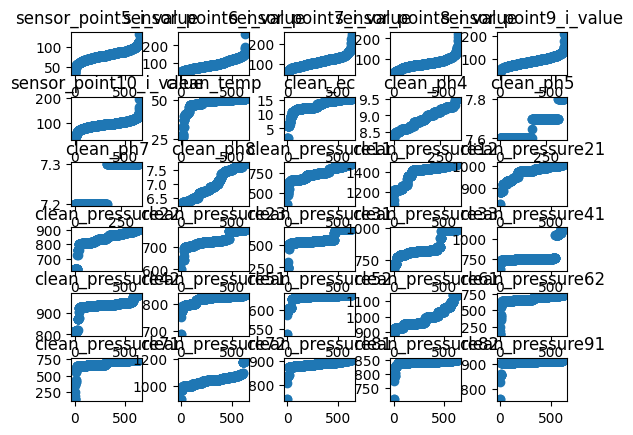

Text(0.5, 1.0, 'clean_pressure92')

Text(0.5, 1.0, 'clean_pressure102')

Text(0.5, 1.0, 'oven_pa1')

Text(0.5, 1.0, 'oven_pa2')

Text(0.5, 1.0, 'oven_pb1')

Text(0.5, 1.0, 'oven_pb2')

Text(0.5, 1.0, 'oven_a1')

Text(0.5, 1.0, 'oven_a2')

Text(0.5, 1.0, 'oven_a3')

Text(0.5, 1.0, 'oven_b1')

Text(0.5, 1.0, 'oven_b2')

Text(0.5, 1.0, 'oven_b3')

Text(0.5, 1.0, 'painting_g1_act_a_air')

Text(0.5, 1.0, 'painting_g1_act_f_air')

Text(0.5, 1.0, 'painting_g1_act_t_air')

Text(0.5, 1.0, 'painting_g1_act_hvv')

Text(0.5, 1.0, 'painting_g1_act_hvc')

Text(0.5, 1.0, 'painting_g2_act_a_air')

Text(0.5, 1.0, 'painting_g2_act_f_air')

Text(0.5, 1.0, 'painting_g2_act_t_air')

Text(0.5, 1.0, 'painting_g2_act_hvv')

Text(0.5, 1.0, 'painting_g2_act_hvc')

Text(0.5, 1.0, 'painting_g3_act_a_air')

Text(0.5, 1.0, 'painting_g3_act_f_air')

Text(0.5, 1.0, 'painting_g3_act_t_air')

Text(0.5, 1.0, 'painting_g3_act_hvv')

Text(0.5, 1.0, 'painting_g3_act_hvc')

Text(0.5, 1.0, 'painting_g4_act_a_air')

Text(0.5, 1.0, 'painting_g4_act_f_air')

Text(0.5, 1.0, 'painting_g4_act_t_air')

C:\Users\randy\AppData\Local\Temp\ipykernel_8320\2239867827.py:8: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.5, wspace=0.5)


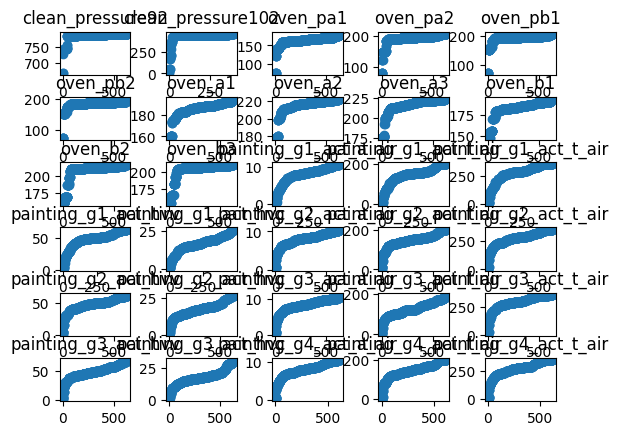

Text(0.5, 1.0, 'painting_g4_act_hvv')

Text(0.5, 1.0, 'painting_g4_act_hvc')

Text(0.5, 1.0, 'painting_g5_act_a_air')

Text(0.5, 1.0, 'painting_g5_act_f_air')

Text(0.5, 1.0, 'painting_g5_act_t_air')

Text(0.5, 1.0, 'painting_g5_act_hvv')

Text(0.5, 1.0, 'painting_g5_act_hvc')

Text(0.5, 1.0, 'painting_g7_act_a_air')

Text(0.5, 1.0, 'painting_g7_act_f_air')

Text(0.5, 1.0, 'painting_g7_act_t_air')

Text(0.5, 1.0, 'painting_g7_act_hvv')

Text(0.5, 1.0, 'painting_g7_act_hvc')

Text(0.5, 1.0, 'painting_g8_act_a_air')

Text(0.5, 1.0, 'painting_g8_act_f_air')

Text(0.5, 1.0, 'painting_g8_act_t_air')

Text(0.5, 1.0, 'painting_g8_act_hvv')

Text(0.5, 1.0, 'painting_g8_act_hvc')

Text(0.5, 1.0, 'painting_g9_act_a_air')

Text(0.5, 1.0, 'painting_g9_act_f_air')

Text(0.5, 1.0, 'painting_g9_act_t_air')

Text(0.5, 1.0, 'painting_g9_act_hvv')

Text(0.5, 1.0, 'painting_g9_act_hvc')

Text(0.5, 1.0, 'painting_g10_act_a_air')

Text(0.5, 1.0, 'painting_g10_act_f_air')

Text(0.5, 1.0, 'painting_g10_act_t_air')

Text(0.5, 1.0, 'painting_g10_act_hvv')

Text(0.5, 1.0, 'painting_g10_act_hvc')

Text(0.5, 1.0, 'painting_g11_act_a_air')

Text(0.5, 1.0, 'painting_g11_act_f_air')

Text(0.5, 1.0, 'painting_g11_act_t_air')

C:\Users\randy\AppData\Local\Temp\ipykernel_8320\2239867827.py:8: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(hspace=0.5, wspace=0.5)


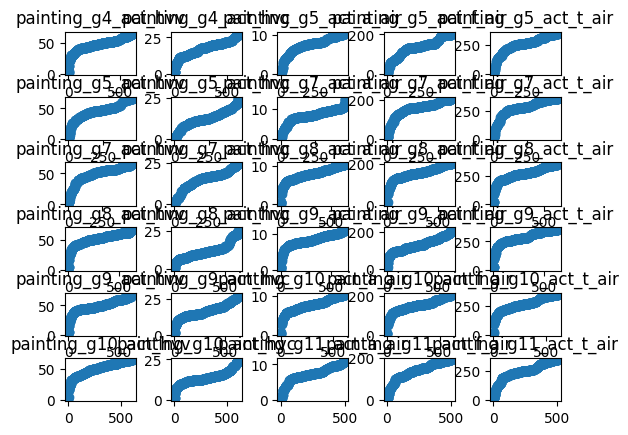

Text(0.5, 1.0, 'painting_g11_act_hvv')

Text(0.5, 1.0, 'painting_g11_act_hvc')

Text(0.5, 1.0, 'env_rpi05_hum')

Text(0.5, 1.0, 'env_rpi05_pm1')

Text(0.5, 1.0, 'env_rpi05_pm10')

Text(0.5, 1.0, 'env_rpi05_pm25')

Text(0.5, 1.0, 'env_rpi05_temp')

Text(0.5, 1.0, 'env_rpi07_hum')

Text(0.5, 1.0, 'env_rpi07_pm1')

Text(0.5, 1.0, 'env_rpi07_pm10')

Text(0.5, 1.0, 'env_rpi07_pm25')

Text(0.5, 1.0, 'env_rpi07_temp')

Text(0.5, 1.0, 'env_rpi09_hum')

Text(0.5, 1.0, 'env_rpi09_pm1')

Text(0.5, 1.0, 'env_rpi09_pm10')

Text(0.5, 1.0, 'env_rpi09_pm25')

Text(0.5, 1.0, 'env_rpi09_temp')

Text(0.5, 1.0, 'env_rpi14_hum')

Text(0.5, 1.0, 'env_rpi14_lux')

Text(0.5, 1.0, 'env_rpi14_pm1')

Text(0.5, 1.0, 'env_rpi14_pm10')

Text(0.5, 1.0, 'env_rpi14_pm25')

Text(0.5, 1.0, 'env_rpi14_temp')

Text(0.5, 1.0, 'env_rpi15_hum')

Text(0.5, 1.0, 'env_rpi15_lux')

Text(0.5, 1.0, 'env_rpi15_pm1')

Text(0.5, 1.0, 'env_rpi15_pm10')

Text(0.5, 1.0, 'env_rpi15_pm25')

Text(0.5, 1.0, 'env_rpi15_temp')

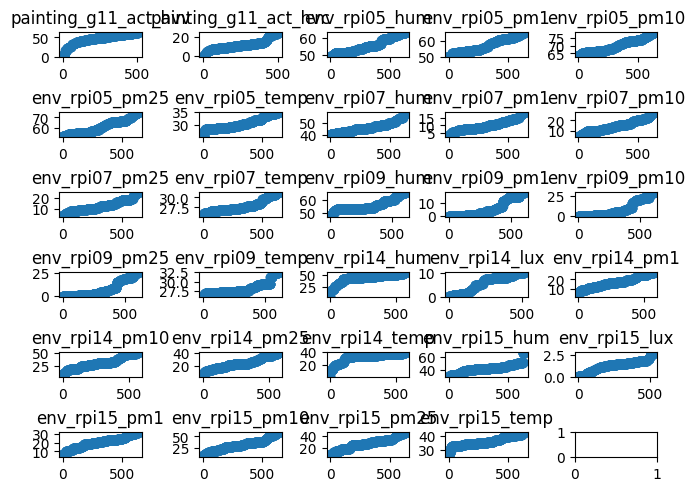

In [12]:
fix, ax = plt.subplots(6, 5, constrained_layout=True)
x = 0
for i in range(df.shape[1]):
    ax[(i//5)%6][i%5 ].set_title(df.columns[i])
    ax[(i//5)%6][i%5 ].scatter(df.index,df.iloc[:, i].sort_values())
    if i % 30 == 29:
        x += 1
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.savefig('index plot' + str(x) +'.pdf')
        plt.show()
        fix, ax = plt.subplots(6, 5, constrained_layout=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x231b09692e0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b0969940>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b094ae50>,
 'medians': [<matplotlib.lines.Line2D at 0x231af77a0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x231af77a430>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

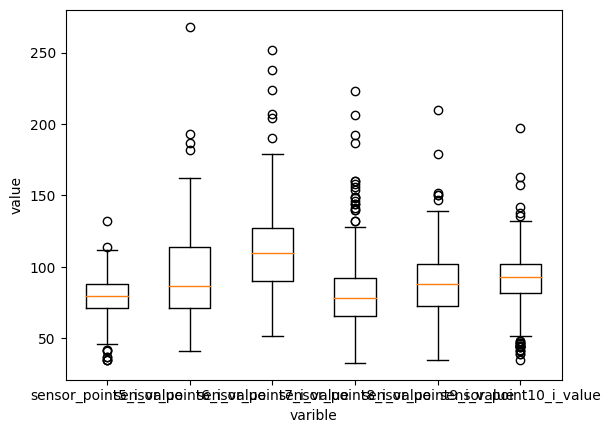

In [13]:
plt.boxplot(df.iloc[:, :6], labels = df.columns[:6])
plt.xlabel('varible')
plt.ylabel('value')
plt.show()

In [14]:
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [15]:
std = StandardScaler()
df_std = std.fit_transform(df)

In [16]:
imputer = KNNImputer(n_neighbors = 11)
imputed = imputer.fit_transform(df_std)

df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed.iloc[:, 0:6] = df.iloc[:, 0:6] 

In [17]:
df.describe()

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,...,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,349.000000,349.000000,...,570.000000,570.000000,570.000000,570.000000,635.000000,524.000000,635.000000,635.000000,635.000000,635.000000
mean,79.234646,92.929134,110.897638,80.311811,88.499213,92.125984,47.775591,13.052756,8.920086,7.659742,...,17.139737,31.125860,23.989754,31.813281,41.780110,1.254790,20.264693,32.169260,27.748016,35.926850
std,13.225658,28.081501,27.200690,24.850857,21.006862,17.572649,5.155023,2.332775,0.290066,0.065585,...,5.626431,11.123375,8.401313,6.490393,5.941645,0.606057,6.153902,11.710205,9.198940,3.097482
min,35.000000,41.000000,52.000000,33.000000,35.000000,35.000000,25.450000,1.500000,8.300000,7.600000,...,2.550000,4.770000,3.770000,3.620000,30.340000,0.050000,4.550000,8.000000,6.110000,25.230000
25%,71.000000,71.500000,90.000000,66.000000,73.000000,82.000000,47.300000,12.070000,8.630000,7.600000,...,12.540000,24.000000,17.015000,32.440000,39.240000,0.890000,14.660000,23.000000,19.090000,33.850000
50%,80.000000,87.000000,110.000000,78.000000,88.000000,93.000000,49.700000,13.550000,8.910000,7.700000,...,16.770000,30.000000,22.770000,33.610000,41.780000,1.370000,20.550000,30.640000,27.550000,35.080000
75%,88.000000,114.000000,127.000000,92.000000,102.000000,102.000000,50.400000,14.830000,9.190000,7.700000,...,21.280000,39.620000,30.242500,36.150000,44.190000,1.620000,23.850000,38.750000,33.140000,38.860000
max,132.000000,268.000000,252.000000,223.000000,210.000000,197.000000,50.900000,15.400000,9.500000,7.800000,...,27.000000,50.870000,40.500000,38.400000,65.660000,2.710000,31.280000,57.710000,46.000000,42.190000


In [18]:
df_imputed

,sensor_point5_i_value,sensor_point6_i_value,sensor_point7_i_value,sensor_point8_i_value,sensor_point9_i_value,sensor_point10_i_value,clean_temp,clean_ec,clean_ph4,clean_ph5,...,env_rpi14_pm1,env_rpi14_pm10,env_rpi14_pm25,env_rpi14_temp,env_rpi15_hum,env_rpi15_lux,env_rpi15_pm1,env_rpi15_pm10,env_rpi15_pm25,env_rpi15_temp
0,42.0,56.0,82.0,41.0,73.0,45.0,-1.295989,-0.28004,-0.982674,2.141642,...,1.634844,1.473341,1.589271,0.400438,0.328432,-1.246601,1.501907,1.652061,1.550529,-0.370544
1,37.0,60.0,58.0,40.0,64.0,42.0,-1.295989,-0.28004,-0.853992,2.141642,...,1.634844,1.473341,1.589271,0.400438,0.328432,-1.246601,1.501907,1.652061,1.550529,-0.370544
2,35.0,66.0,62.0,39.0,86.0,45.0,-1.295989,-0.28004,-0.791220,2.141642,...,1.634844,1.473341,1.589271,0.400438,0.328432,-1.246601,1.501907,1.652061,1.550529,-0.370544
3,37.0,58.0,58.0,42.0,52.0,39.0,-1.295989,-0.28004,-0.853992,2.141642,...,1.634844,1.473341,1.589271,0.400438,0.328432,-1.246601,1.501907,1.652061,1.550529,-0.370544
4,57.0,78.0,62.0,51.0,64.0,65.0,-1.295989,-0.28004,-1.039168,2.141642,...,1.702441,1.594813,1.685769,0.411233,0.363804,-1.378728,1.536058,1.681973,1.596222,-0.357621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,97.0,82.0,115.0,118.0,129.0,102.0,0.460964,-0.28004,0.931863,-0.912222,...,1.220363,1.371664,1.222340,0.835308,-1.541210,0.404985,0.404177,0.263289,0.366851,1.361258
631,92.0,87.0,108.0,98.0,110.0,98.0,0.460964,-0.28004,0.931863,-0.912222,...,1.220363,1.371664,1.222340,0.835308,-1.541210,0.404985,0.404177,0.263289,0.366851,1.361258
632,100.0,84.0,118.0,86.0,119.0,114.0,0.460964,-0.28004,0.931863,-0.912222,...,1.220363,1.371664,1.222340,0.835308,-1.541210,0.404985,0.404177,0.263289,0.366851,1.361258
633,100.0,94.0,144.0,81.0,150.0,99.0,0.460964,-0.28004,0.931863,-0.912222,...,1.220363,1.371664,1.222340,0.835308,-1.541210,0.404985,0.404177,0.263289,0.366851,1.361258


<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b08a2cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b08b1130>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b08a2f10>,
 'medians': [<matplotlib.lines.Line2D at 0x231b08b1a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b08b1190>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

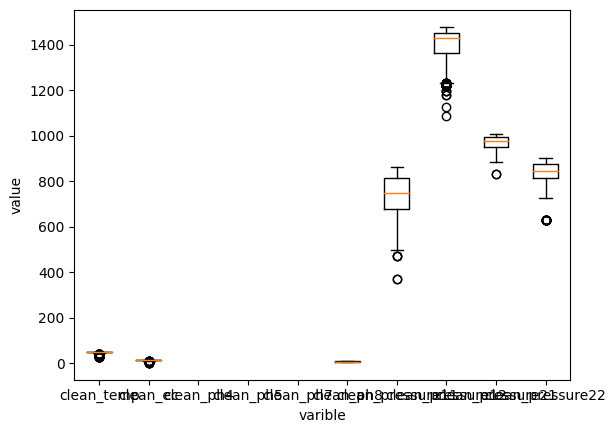

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b14928e0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b14a2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b1492670>,
 'medians': [<matplotlib.lines.Line2D at 0x231b14a2760>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b14a2af0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

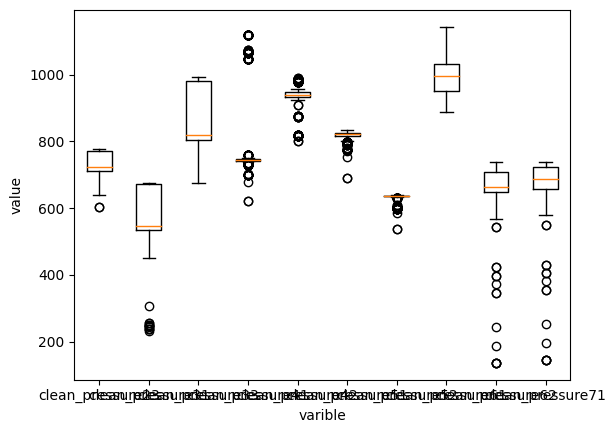

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b170eee0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b171f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b170ec70>,
 'medians': [<matplotlib.lines.Line2D at 0x231b171fd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b172a130>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

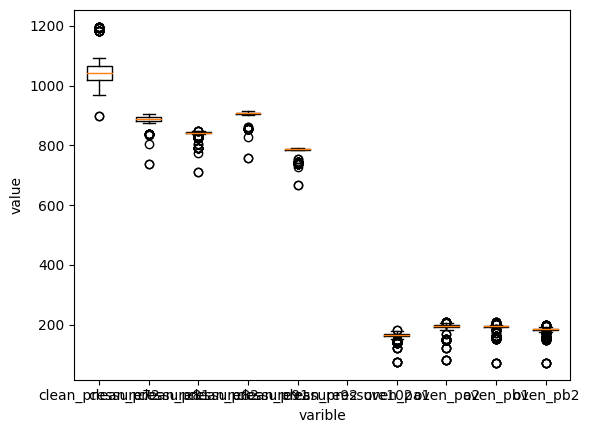

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b195bac0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b196a220>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b195b850>,
 'medians': [<matplotlib.lines.Line2D at 0x231b196a940>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b196acd0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

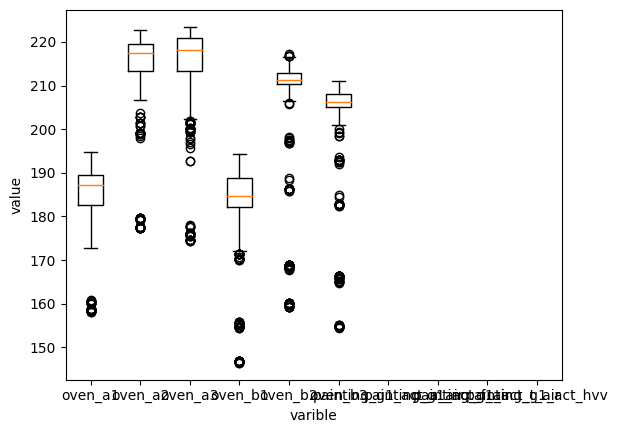

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b15729d0>,
 'caps': [<matplotlib.lines.Line2D at 0x231b1572070>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b1492100>,
 'medians': [<matplotlib.lines.Line2D at 0x231b157fd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b157f160>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

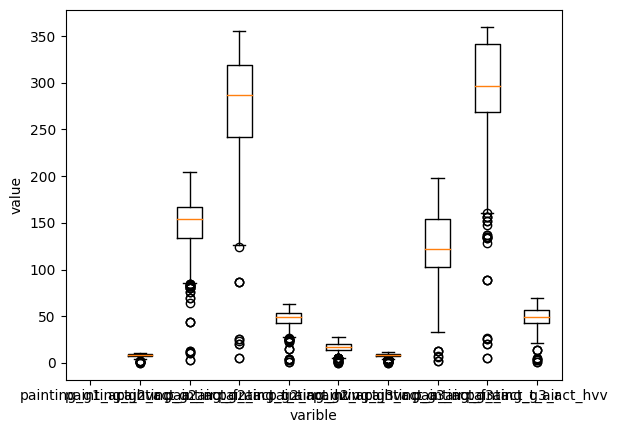

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b0e21340>,
 'caps': [<matplotlib.lines.Line2D at 0x231b0e21670>,
 'boxes': [<matplotlib.lines.Line2D at 0x231aeda09d0>,
 'medians': [<matplotlib.lines.Line2D at 0x231b0e1ab80>,
 'fliers': [<matplotlib.lines.Line2D at 0x231b0e1a7c0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

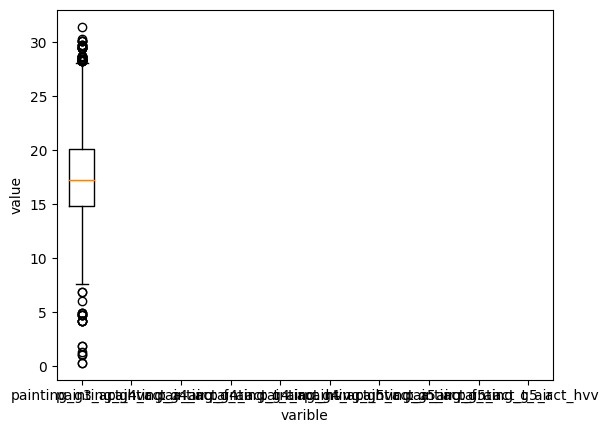

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231af282d60>,
 'caps': [<matplotlib.lines.Line2D at 0x231af1fdc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x231af282220>,
 'medians': [<matplotlib.lines.Line2D at 0x231af1fd730>,
 'fliers': [<matplotlib.lines.Line2D at 0x231aef803d0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

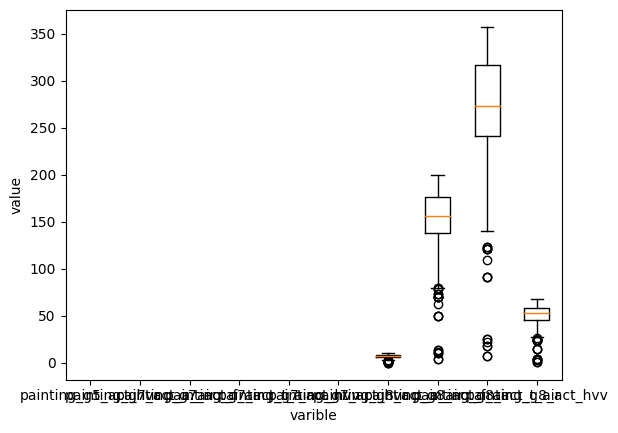

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231aefae130>,
 'caps': [<matplotlib.lines.Line2D at 0x231aefae0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x231aefaedf0>,
 'medians': [<matplotlib.lines.Line2D at 0x231af2e4b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x231af2e4dc0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

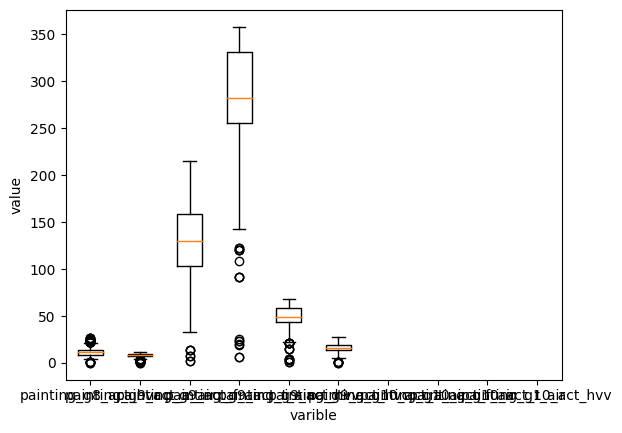

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231b0e12880>,
 'caps': [<matplotlib.lines.Line2D at 0x231aeff67f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x231b0e12130>,
 'medians': [<matplotlib.lines.Line2D at 0x231aefe1070>,
 'fliers': [<matplotlib.lines.Line2D at 0x231aefe1fd0>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

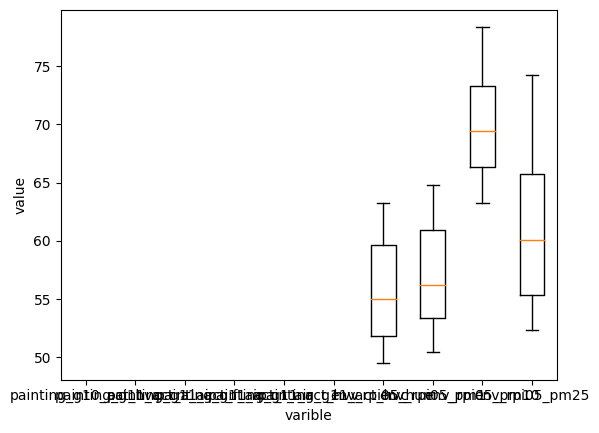

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231acd05250>,
 'caps': [<matplotlib.lines.Line2D at 0x231acd05970>,
 'boxes': [<matplotlib.lines.Line2D at 0x231acd30fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x231acd320d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x231acd32460>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

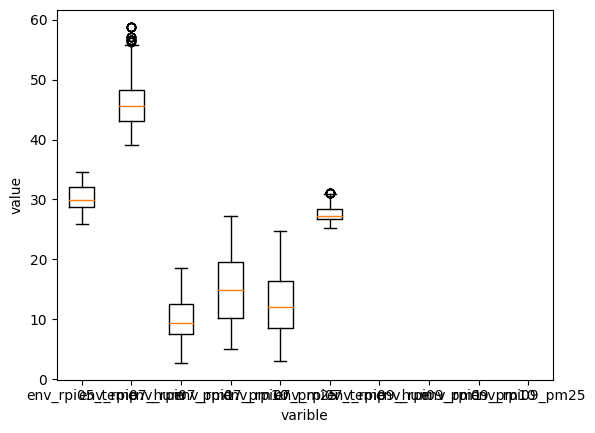

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231acc22040>,
 'caps': [<matplotlib.lines.Line2D at 0x231acc3d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x231acc223a0>,
 'medians': [<matplotlib.lines.Line2D at 0x231acc3de50>,
 'fliers': [<matplotlib.lines.Line2D at 0x231acc0d220>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

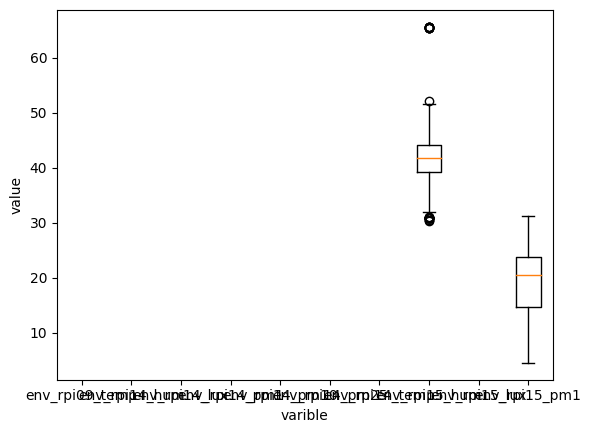

<Figure size 640x480 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x231acd6f730>,
 'caps': [<matplotlib.lines.Line2D at 0x231acd6fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x231acd6f4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x231acd595b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x231acd59940>,
 'means': []}

Text(0.5, 0, 'varible')

Text(0, 0.5, 'value')

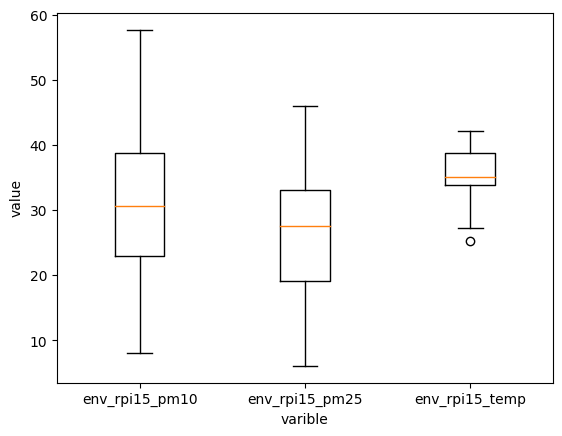

In [20]:
for i in range(6, df.shape[1], 10):
    plt.figure()
    plt.boxplot(df.iloc[:, i:(i + 10)], labels = df.columns[i:(i + 10)])
    plt.xlabel('varible')
    plt.ylabel('value')
    plt.show()

In [21]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [22]:
kf = KFold(n_splits = 10, shuffle=True, random_state=1234)

In [23]:
target_1 = df_imputed.iloc[:, 0]
train = df_imputed.iloc[:, 6:]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_imputed.iloc[:,6:], df_imputed.iloc[:,0:6], test_size=0.2) 

In [25]:
idx = y_test.index

In [26]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:

x_train = torch.tensor(x_train, dtype = torch.float32)
x_test = torch.tensor(x_test, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(113, 1024)
        self.batch1 = nn.BatchNorm1d(1024)
        self.LeakyRelu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.batch2 = nn.BatchNorm1d(512)
        self.LeakyRelu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(512, 256)
        self.batch3 = nn.BatchNorm1d(256)
        self.PRelu1 = nn.PReLU()
        self.fc4 = nn.Linear(256, 128)
        self.batch4 = nn.BatchNorm1d(128)
        self.PRelu2 = nn.PReLU()
        self.fc5 = nn.Linear(128, 64)
        self.batch5 = nn.BatchNorm1d(64)
        self.PRelu3 = nn.PReLU()
        self.fc6 = nn.Linear(64, 32)
        self.batch6 = nn.BatchNorm1d(32)
        self.Relu1 = nn.ReLU()
        self.fc7 = nn.Linear(32, 16)
        self.batch7 = nn.BatchNorm1d(16)
        self.Relu2 = nn.ReLU()
        self.out = nn.Linear(16, 6)
    def forward(self, x):
        x = self.LeakyRelu1(self.batch1(self.fc1(x)))
        x = self.LeakyRelu2(self.batch2(self.fc2(x)))
        x = self.PRelu1(self.batch3(self.fc3(x)))
        x = self.PRelu2(self.batch4(self.fc4(x)))
        x = self.PRelu3(self.batch5(self.fc5(x)))
        x = self.Relu1(self.batch6(self.fc6(x)))
        x = self.Relu2(self.batch7(self.fc7(x)))
        output = self.out(x)
        
        return output

In [29]:
class Net_rnn(nn.Module):
    def __init__(self):
        super(Net_rnn, self).__init__()
        self.fc1 = nn.LSTM(113, 256, num_layers = 4)
        self.batch1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 64)
        self.batch2 = nn.BatchNorm1d(64)
        self.PRelu = nn.PReLU()
        self.out = nn.Linear(64, 6)
    def forward(self, x):
        x, h_out1 = self.fc1(x)
        x = self.batch1(x)
        x = self.PRelu(self.batch2(self.fc2(x)))
        output = self.out(x)
        
        return output

In [ ]:
model = Net().to('cuda')
RNN_model = Net_rnn().to('cuda')

In [ ]:
torch_data = TensorDataset(x_train, y_train)
torch_data_test  = TensorDataset(x_test, y_test)

In [ ]:
train_dataloader = DataLoader(torch_data, batch_size = 8, shuffle = True)
test_dataloader = DataLoader(torch_data_test, batch_size = 8)

In [ ]:
def train(model, optimizer, train_loader, criterion, epochs):
    model.train()
    loss_list = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to('cuda'), target.to('cuda')
        optimizer.zero_grad()
        output = model(data)
        loss = torch.sqrt(criterion(output, target))
        loss.backward()
        optimizer.step()
        
        if (batch_idx + 1) % 10 == 0:
            loss_list.append(loss.item())
            batch = (batch_idx + 1) * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * (batch_idx + 1) / len(train_loader))
            print(f'Epoch {epochs}: [{batch:5d} / {data_count}]' + f'({percentage:.0f}%) Loss: {loss.item():.6f}')
    return loss_list

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    predict = torch.tensor([]).to('cuda')
    tar = torch.tensor([]).to('cuda')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cuda'), target.to('cuda')
            output = model(data)
            predict = torch.cat([predict, output], dim = 0)
            tar = torch.cat([tar, target], dim = 0)
    test_loss = torch.sqrt(criterion(predict, tar))
    print(f'平均RMSE: {test_loss:.6f}')
    return predict

In [ ]:
epochs = 100
lr = 0.0001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
loss_list = []
for epoch in range(1, epochs + 1):
    loss_list += train(model, optimizer, train_dataloader, criterion, epoch)
    optimizer.step()

Epoch 1: [   80 / 508](16%) Loss: 16.323515
Epoch 1: [  160 / 508](31%) Loss: 28.761368
Epoch 1: [  240 / 508](47%) Loss: 17.200319
Epoch 1: [  320 / 508](62%) Loss: 14.987274
Epoch 1: [  400 / 508](78%) Loss: 22.463345
Epoch 1: [  480 / 508](94%) Loss: 16.830568
Epoch 2: [   80 / 508](16%) Loss: 12.793382
Epoch 2: [  160 / 508](31%) Loss: 8.841503
Epoch 2: [  240 / 508](47%) Loss: 12.962223
Epoch 2: [  320 / 508](62%) Loss: 12.972922
Epoch 2: [  400 / 508](78%) Loss: 15.527157
Epoch 2: [  480 / 508](94%) Loss: 25.138924
Epoch 3: [   80 / 508](16%) Loss: 19.532677
Epoch 3: [  160 / 508](31%) Loss: 16.468731
Epoch 3: [  240 / 508](47%) Loss: 15.711101
Epoch 3: [  320 / 508](62%) Loss: 14.792233
Epoch 3: [  400 / 508](78%) Loss: 19.028740
Epoch 3: [  480 / 508](94%) Loss: 17.890760
Epoch 4: [   80 / 508](16%) Loss: 15.526307
Epoch 4: [  160 / 508](31%) Loss: 19.330078
Epoch 4: [  240 / 508](47%) Loss: 12.532005
Epoch 4: [  320 / 508](62%) Loss: 15.664722
Epoch 4: [  400 / 508](78%) Loss:

In [ ]:
pre = test(model, test_dataloader, criterion)

平均RMSE: 15.955033


In [ ]:
clean, oven, painting, env

(26, 10, 50, 27)

In [ ]:
class merge_net(nn.Module):
    def __init__(self, c, o, p, e):
        super(merge_net, self).__init__()
        self.fc1_c = nn.Linear(c, 128)
        self.batch1_c = nn.BatchNorm1d(128)
        self.LeakyRelu1_c = nn.LeakyReLU()
        self.fc2_c = nn.Linear(128, 64)
        self.batch2_c = nn.BatchNorm1d(64)
        self.PRelu1_c = nn.PReLU()
        self.fc3_c = nn.Linear(64, 32)
        self.batch3_c = nn.BatchNorm1d(32)
        self.PRelu2_c = nn.PReLU()
        self.fc4_c = nn.Linear(32, 16)
        self.batch4_c = nn.BatchNorm1d(16)
        self.PRelu3_c = nn.ReLU()
        self.fc5_c = nn.Linear(16, 8)
        self.batch5_c = nn.BatchNorm1d(8)
        self.PRelu4_c = nn.PReLU()
        self.fc6_c = nn.Linear(16, 1)
        
        self.fc1_o = nn.Linear(o, 64)
        self.batch1_o = nn.BatchNorm1d(64)
        self.LeakyRelu1_o = nn.LeakyReLU()
        self.fc2_o = nn.Linear(64, 32)
        self.batch2_o = nn.BatchNorm1d(32)
        self.PRelu1_o = nn.PReLU()
        self.fc3_o = nn.Linear(32, 16)
        self.batch3_o = nn.BatchNorm1d(16)
        self.PRelu2_o = nn.ReLU()
        self.fc4_o = nn.Linear(16, 8)
        self.batch4_o = nn.BatchNorm1d(8)
        self.PRelu3_o = nn.PReLU()
        self.fc5_o = nn.Linear(16, 1)
        
        
        self.fc1_p = nn.Linear(p, 256)
        self.batch1_p = nn.BatchNorm1d(256)
        self.LeakyRelu1_p = nn.LeakyReLU()
        self.fc2_p = nn.Linear(256, 128)
        self.batch2_p = nn.BatchNorm1d(128)
        self.PRelu1_p = nn.PReLU()
        self.fc3_p = nn.Linear(128, 64)
        self.batch3_p = nn.BatchNorm1d(64)
        self.PRelu2_p = nn.PReLU()
        self.fc4_p = nn.Linear(64, 32)
        self.batch4_p = nn.BatchNorm1d(32)
        self.PRelu3_p = nn.ReLU()
        self.fc5_p = nn.Linear(32, 16)
        self.batch5_p = nn.BatchNorm1d(16)
        self.PRelu4_p = nn.PReLU()
        self.fc6_p = nn.Linear(16, 1)
        
        self.fc1_e = nn.Linear(e, 128)
        self.batch1_e = nn.BatchNorm1d(128)
        self.LeakyRelu1_e = nn.LeakyReLU()
        self.fc2_e = nn.Linear(128, 64)
        self.batch2_e = nn.BatchNorm1d(64)
        self.PRelu1_e = nn.PReLU()
        self.fc3_e = nn.Linear(64, 32)
        self.batch3_e = nn.BatchNorm1d(32)
        self.PRelu2_e = nn.ReLU()
        self.fc4_e = nn.Linear(32, 16)
        self.batch4_e = nn.BatchNorm1d(16)
        self.PRelu3_e = nn.PReLU()
        self.fc5_e = nn.Linear(16, 8)
        self.batch5_e = nn.BatchNorm1d(8)
        self.PRelu4_e = nn.PReLU()
        self.fc6_e = nn.Linear(16, 1)
        
        self.out = nn.Linear(40, 6)
    def forward(self, c_d, o_d, p_d, e_d):
        c_d = self.LeakyRelu1_c(self.batch1_c(self.fc1_c(c_d)))
        c_d = self.PRelu1_c(self.batch2_c(self.fc2_c(c_d)))
        c_d = self.PRelu2_c(self.batch3_c(self.fc3_c(c_d)))
        c_d = self.PRelu3_c(self.batch4_c(self.fc4_c(c_d)))
        c_d = self.PRelu4_c(self.batch5_c(self.fc5_c(c_d)))                    
        
        o_d = self.LeakyRelu1_o(self.batch1_o(self.fc1_o(o_d)))
        o_d = self.PRelu1_o(self.batch2_o(self.fc2_o(o_d)))
        o_d = self.PRelu2_o(self.batch3_o(self.fc3_o(o_d)))
        o_d = self.PRelu3_o(self.batch4_o(self.fc4_o(o_d)))                    
        
        p_d = self.LeakyRelu1_p(self.batch1_p(self.fc1_p(p_d)))
        p_d = self.PRelu1_p(self.batch2_p(self.fc2_p(p_d)))
        p_d = self.PRelu2_p(self.batch3_p(self.fc3_p(p_d)))
        p_d = self.PRelu3_p(self.batch4_p(self.fc4_p(p_d)))
        p_d = self.PRelu4_p(self.batch5_p(self.fc5_p(p_d)))
        
        e_d = self.LeakyRelu1_e(self.batch1_e(self.fc1_e(e_d)))
        e_d = self.PRelu1_e(self.batch2_e(self.fc2_e(e_d)))
        e_d = self.PRelu2_e(self.batch3_e(self.fc3_e(e_d)))
        e_d = self.PRelu3_e(self.batch4_e(self.fc4_e(e_d)))
        e_d = self.PRelu4_e(self.batch5_e(self.fc5_e(e_d)))
        
        out = torch.cat((c_d, o_d, p_d, e_d), dim = 1)
        out = self.out(out)
        
        return out



In [ ]:
merge_model = merge_net(clean, oven, painting, env).to('cuda')

    

In [ ]:
def merge_train(model, optimizer, train_loader, criterion, epochs):
    model.train()
    loss_list = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to('cuda'), target.to('cuda')
        optimizer.zero_grad()
        output = model(data[:,0:clean], data[:, clean: (clean + oven)], data[:, (clean + oven): (clean + oven + painting)], data[:,(clean + oven + painting): (clean + oven + painting + env)])
        loss = torch.sqrt(criterion(output, target))
        loss.backward()
        optimizer.step()
        
        if (batch_idx + 1) % 10 == 0:
            loss_list.append(loss.item())
            batch = (batch_idx + 1) * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * (batch_idx + 1) / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}]' + f'({percentage:.0f}%) Loss: {loss.item():.6f}')
    return loss_list

In [ ]:
def merge_test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    predict = torch.tensor([]).to('cuda')
    tar = torch.tensor([]).to('cuda')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cuda'), target.to('cuda')
            output = model(data[:,0:clean], data[:, clean: (clean + oven)], data[:, (clean + oven): (clean + oven + painting)], data[:,(clean + oven + painting): (clean + oven + painting + env)])
            predict = torch.cat([predict, output], dim = 0)
            tar = torch.cat([tar, target], dim = 0)
    test_loss = torch.sqrt(criterion(predict, tar))
    print(f'平均RMSE: {test_loss:.6f}')
    return predict

In [ ]:
epochs = 50
lr = 0.0001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(merge_model.parameters(), lr = lr)
loss_list = []
for epoch in range(1, epochs + 1):
    loss_list += merge_train(merge_model, optimizer, train_dataloader, criterion, epoch)
    optimizer.step()

Epoch 1: [   80 / 508](16%) Loss: 16.659029
Epoch 1: [  160 / 508](31%) Loss: 18.940994
Epoch 1: [  240 / 508](47%) Loss: 18.086540
Epoch 1: [  320 / 508](62%) Loss: 14.640930
Epoch 1: [  400 / 508](78%) Loss: 17.398926
Epoch 1: [  480 / 508](94%) Loss: 20.748854
Epoch 2: [   80 / 508](16%) Loss: 15.554884
Epoch 2: [  160 / 508](31%) Loss: 11.375002
Epoch 2: [  240 / 508](47%) Loss: 30.401396
Epoch 2: [  320 / 508](62%) Loss: 13.393320
Epoch 2: [  400 / 508](78%) Loss: 24.603968
Epoch 2: [  480 / 508](94%) Loss: 16.886795
Epoch 3: [   80 / 508](16%) Loss: 16.191916
Epoch 3: [  160 / 508](31%) Loss: 11.804455
Epoch 3: [  240 / 508](47%) Loss: 16.498337
Epoch 3: [  320 / 508](62%) Loss: 14.264928
Epoch 3: [  400 / 508](78%) Loss: 11.485719
Epoch 3: [  480 / 508](94%) Loss: 10.298872
Epoch 4: [   80 / 508](16%) Loss: 26.697071
Epoch 4: [  160 / 508](31%) Loss: 14.425951
Epoch 4: [  240 / 508](47%) Loss: 14.073300
Epoch 4: [  320 / 508](62%) Loss: 13.610917
Epoch 4: [  400 / 508](78%) Loss

In [ ]:
merge_test(merge_model, test_dataloader, criterion)

平均RMSE: 14.946265


tensor([[ 71.8661,  70.8862,  99.0917, 101.2340,  84.7485,  89.3503],
        [ 79.4333, 110.3242, 126.1594,  77.7693,  91.6990,  94.9344],
        [ 69.4387,  66.6760, 106.8442,  98.9473,  81.7465,  89.1801],
        [ 84.1867,  87.1724, 122.9488,  74.6726,  80.0209,  89.6632],
        [ 82.4343,  86.3823, 108.2210,  69.6499,  88.1005,  90.9370],
        [ 78.7585, 111.9381, 129.6020,  77.8895,  91.6136,  94.1388],
        [ 72.6344, 112.4895, 128.0410,  83.3257, 112.0040, 103.3648],
        [ 86.6615,  98.9511, 126.0068, 103.0942, 106.0336, 102.2818],
        [ 82.0464,  88.2014, 121.7528,  72.3639,  80.7316,  89.8363],
        [ 85.4027,  91.8363, 133.8167,  95.1804, 104.2964,  99.9960],
        [ 80.5743,  76.2728, 103.3995,  74.7289,  82.3570,  89.9174],
        [ 72.0120,  70.7729,  99.1814, 100.9811,  84.7730,  89.4046],
        [ 90.4113, 108.6992, 107.3707,  83.5237,  87.0312,  94.4845],
        [ 64.8245,  97.8750, 118.1374,  73.4102,  96.9597,  91.0690],
        [ 84.4761,  